In [1]:
import pandas as pd 
from importlib.resources import path
import re
import pprint
import os
from numpy import size
path="/home/longin/dissertation/dataset/Data"
os.chdir(path)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [2]:
## function for reading txt data.
def readfile(file_path):

    fileObject = open(file_path, 'r',encoding='cp1250')
    data = fileObject.read()
    portern='Respondent(.+)'
    result=re.findall(portern,data)
    # comvert list to string 
    dataset=' '.join(str(item) for item in result)
    return dataset




In [3]:
import re
def convert_time(time):
  # Split the time into hours, minutes, and seconds
  hour, minute, second = time.split(":")
  portern='[0-9]{2}'
  second=re.findall(portern,second)
  second=''.join(second)

  # Convert hours to 24-hour format
  if time.endswith("PM") and int(hour) < 12:
    hour = str(int(hour) + 12)
  elif time.endswith("AM") and hour == "12":
    hour = "00"

  # Return the time in 24-hour format
  result=hour +':'+ minute +':'+ second
  return result
time='13:00:00PM'
result=convert_time(time)
print(result)

13:00:00


In [60]:
# iterate through all file
dataset=""
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        file_name = os.path.basename(file_path)
        #print(os.path.splitext(file_name)[0])
        transcritdata=readfile(file_path)
        dataset=dataset+transcritdata
# dataset

# data cleaning 
removing uneccesary charactors lile "": and () even reading spaces


In [5]:
def datasetclening(text):
    """
        This function is removing unnecessary characters  
    """
    Char_repacede_by_space = re.compile(':') # charactor replaces by space
    Char_prathesis = re.compile('[()]') # charactor replaces by space
    remove_readinf_space=re.compile('\s\s+') # removing reading space
    text = text.lower() # lowercase text
    text = Char_repacede_by_space.sub(' ', text)# remove spacial charactors
    text = Char_prathesis.sub(' ', text)# remove prathesis 
    text= remove_readinf_space.sub('', text) # removing reading space
    #text.lstrip() # remove reading space
    

    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [62]:
dataset= datasetclening(dataset)

# dataset

# txt sumarization 

In [7]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

/home/longin/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# making list of stop words
stop_words=list(STOP_WORDS)


#stop_words


In [9]:
# create  NLP module
nlp=spacy.load("en_core_web_sm")
# tokinize word in document
doc=nlp(dataset)
tokens=[token.text for token in doc]


In [10]:
# adding new line into puctuation list
punctuation=punctuation+"\n"
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [11]:
word_frequencies={}
for word in doc:
    if word.text.lower() not in stop_words:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text]=1
            else:
                word_frequencies[word.text]+=1

In [12]:
# get maximum word frequencies
max_frequency=max(word_frequencies.values())
print(max_frequency)


593


In [13]:
for word in word_frequencies:
    if word_frequencies[word]==381:
        print(word)

ppp


In [14]:
del word_frequencies['think']

In [15]:
# standarizing frequencies 
for word in word_frequencies.keys():
    word_frequencies[word]=word_frequencies[word]/max_frequency

In [16]:
# sentence tokinization
from textblob import Sentence
Sentence_tokens=[sent for sent in doc.sents]



In [17]:
# sentence score
Sentence_scores={}
for sent in Sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in Sentence_scores.keys():
                Sentence_scores[sent]=word_frequencies[word.text.lower()]
            else:
                Sentence_scores[sent] +=word_frequencies[word.text.lower()]
                


In [18]:
# geting 0.3 percent of sentense with maximun score
from heapq import nlargest
select_length=int(len(Sentence_tokens)*0.001)
select_length

2

In [19]:
summary=nlargest(select_length,Sentence_scores,key=Sentence_scores.get)


In [20]:
# making into one string
final_summury=[word.text for word in summary]
summary= ' '.join(final_summury)
summary

'but it was maturing together a project which the government of rwanda would have induced for partnership.teams from moh, rbc and rdbchai come in not as a negotiator, come in to help and go in depth into the partnership and it has accompanied efforts at the feasibility lever in terms of financing, facilitation and it has never been involved into negotiation.no, we were still at the feasibility study level, so before it is completed, there is nothing else that could be done.with attitude of happiness , yes of course i am the onewith sureness attitude , yes of course you know new initiatives, do not go as smooth as you expect, many people saw into the ppp process, a kind of giving, to one partner the whole procurement of the whole process which is not always welcomed by everyone, so that is a hump already into the negotiation or the contracting of any partner, and i think if things are not well explained far before it might also be a hampering point or a sticking point at any contracting

In [21]:
print(len(dataset))
print(len(summary))

353718
3680


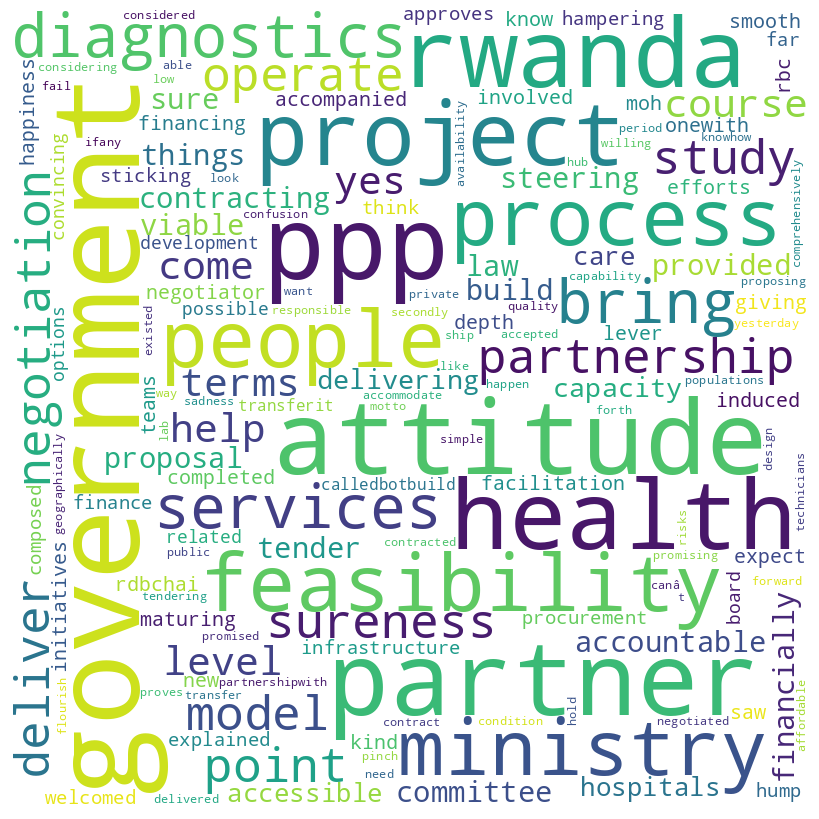

In [22]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(summary)

 
 #summary
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Creating puting Question and Answers into dataFrame for better Analysis 

In [23]:
def createDataFrame(path):
    
    Questionsfull=[]
    responsesfull=[]
    QuestionsNumberfull=[]
    TranscodeListfull=[]
    for file in os.listdir():
    
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}/{file}"
            # call read text file function
            fileObject = open(file_path, 'r',encoding='cp1250')
            data = fileObject.read()
            porternQ='Interviewer(.+)'
            porternA='Respondent(.+)'
            Questions=re.findall(porternQ,data)
            responses=re.findall(porternA,data)
            QuestionsNumber=list(range(1,len(Questions)+1))
            # comvert list to string 
            file_name = os.path.basename(file_path)
            # file name without extension
            Transcode=os.path.splitext(file_name)[0]
            # creating a list of single transcipt code 
            TranscodeList=[Transcode]*len(Questions)

            Questionsfull.extend(Questions)
            responsesfull.extend(responses)
            QuestionsNumberfull.extend(QuestionsNumber)
            TranscodeListfull.extend(TranscodeList)
            ## comvert transcripts into python pandas
    df = pd.DataFrame(list(zip(Questionsfull, responsesfull,QuestionsNumberfull,TranscodeListfull)),
    columns =['Questions', 'Responses','Question number','Transcripts'])
    return df
            

In [57]:
df=createDataFrame(path)
dataset=df
df['Questions']=df['Questions'].apply(datasetclening)
df['Responses']=df['Responses'].apply(datasetclening)
df['Transcripts']=df['Transcripts'].apply(datasetclening)
df.to_csv('response_and_answer.csv', index=False)
df.head(10)

,Questions,Responses,Question number,Transcripts
0,so the first question that we have for you is ...,i was not involved at all. okay.,1,rwa_int_pe_2021_12_23
1,so then are you at least a little bit familiar...,"no, i think there is no formal engagement that...",2,rwa_int_pe_2021_12_23
2,and then do you know if your institutions was ...,it was not.,3,rwa_int_pe_2021_12_23
3,so this you are because you are not involved a...,"no, only know that it was about the lab and i ...",4,rwa_int_pe_2021_12_23
4,"so then, based on the few information that you...","yes. i think one of my other meetings, i met d...",5,rwa_int_pe_2021_12_23
5,then we are still going to go through what you...,"no, i don't recall anyone like trying to oppos...",6,rwa_int_pe_2021_12_23
6,"and then for the ppp, i think, you know, the c...",to me rdb i don't know if they were part of it...,7,rwa_int_pe_2021_12_23
7,"okay. so do you, are you aware of the differen...",no i didn't take part in this discussion.,8,rwa_int_pe_2021_12_23
8,"it's good. okay. so you know, that ahdp is a p...",i think the lab network is something that moh ...,9,rwa_int_pe_2021_12_23
9,"it was mainly, looking at first of all, the pu...",i think that's the point i wanted to make is t...,10,rwa_int_pe_2021_12_23


# Creating  a document base on Answers 



In [56]:
QuestionN=list(df['Question number'])

QuestionN=list(set(QuestionN))
AllAnser=[]
for i in QuestionN:
    df_Answer=df[df['Question number']==i]
    ## convert into list 
    List_answer=list(df_Answer['Responses'])
    anser=''.join(str(item) for item in List_answer)
    AllAnser.append(anser)
    
df = pd.DataFrame(list(zip(QuestionN, AllAnser)),columns =['Question number', 'Responses'])
df.head(10)


,Question number,Responses
0,1,involved okay think part sustainability financ...
1,2,think formal engagement project hear friends e...
2,3,involved proposal engaging trying manage curre...
3,4,know dont know much details particular pppif r...
4,5,think meetings lunch colleagues meeting rememb...
5,6,dont recall anyone like trying oppose thatthe ...
6,7,dont know part think institution least know bu...
7,8,didnt take part discussion issues first someon...
8,9,think network something working strengthen cap...
9,10,think thats point wanted make financial viabil...


# Topic modeling 

In [26]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [27]:
## cleaning dataset
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [28]:
#Apply data cleaning of responses
df['Responses'] = df['Responses'].apply(clean_text)
#knowing size for each Gorup of responses 
df['Num_words_text'] = df['Responses'].apply(lambda x:len(str(x).split())) 
## removing Questions that have very short Ansener
df.drop(df[df.Num_words_text < 20].index, inplace=True)
df_w2vec=df


In [65]:
# removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text
# remove stopwords from the text
df['Responses']=df['Responses'].apply(remove_stopwords)


In [30]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
## apply lemmatizition means finding smllar word like names and Adjectives 
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [31]:
response_list=df['Responses'].tolist()
print(response_list[1])
tokenized_response = lemmatization(response_list)
print('=======================================')
print(tokenized_response[1])  

think formal engagement project hear friends either participated involved particularly involved process involved different meetings project submitted together different divisions departments planning clinical services participated actively meetings trying analyze contents project together chaithose educated feasibility study findings cannot discuss findings dont feasibility study conducted business laboratory medical equipment quite many years worked country definitely state certain problems encountered health provisionnumber procurement process believe problem procurement process overall regards system laboratory gives needs testing tabulate centralized procurement process believe sometimes sector nine teams missing procurement even start procurement plan consult agree list items required process things left okay imagine order perform analysis need three components components third component bought cannot perform problemsanother training users facilities case rwanda apparently high tu

In [73]:
# Create Dictionary
id2word = corpora.Dictionary(tokenized_response)

# Create Corpus
texts = tokenized_response

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
print(id2word[3])


"Dictionary<2022 unique tokens: ['able', 'access', 'accountability', 'actual', 'affordability']...>"

In [33]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 3),
  ('access', 2),
  ('accountability', 1),
  ('actual', 1),
  ('affordability', 1),
  ('agreement', 1),
  ('amount', 1),
  ('art', 1),
  ('aspect', 4),
  ('assessment', 1),
  ('attractive', 1),
  ('aware', 2),
  ('balance', 2),
  ('ballgame', 1),
  ('bank', 1),
  ('bill', 1),
  ('bottom', 1),
  ('briefly', 1),
  ('budget', 2),
  ('business', 1),
  ('cabinet', 1),
  ('caliber', 1),
  ('capability', 1),
  ('care', 1),
  ('cause', 1),
  ('center', 2),
  ('chai', 2),
  ('challenge', 1),
  ('change', 1),
  ('chemistry', 1),
  ('clear', 1),
  ('clearthey', 1),
  ('clinical', 1),
  ('collection', 1),
  ('combination', 1),
  ('committee', 1),
  ('company', 1),
  ('condition', 1),
  ('contract', 1),
  ('contribution', 1),
  ('cost', 4),
  ('country', 3),
  ('coverage', 1),
  ('covered', 1),
  ('customer', 1),
  ('decision', 1),
  ('delivery', 1),
  ('design', 1),
  ('diagnostic', 3),
  ('different', 8),
  ('direction', 2),
  ('discussion', 2),
  ('district', 1),
  ('dual', 1),
  (

In [34]:
# Create vocabulary dictionary and document term matrix
dictionary = corpora.Dictionary(tokenized_response)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_response]

In [35]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [36]:
# printing topics
lda_model.print_topics()

[(0,
  '0.021*"service" + 0.015*"private" + 0.013*"level" + 0.013*"thing" + 0.012*"laboratory" + 0.012*"government" + 0.012*"hospital" + 0.011*"time" + 0.010*"cost" + 0.009*"study"'),
 (1,
  '0.025*"government" + 0.013*"hospital" + 0.012*"project" + 0.011*"health" + 0.010*"time" + 0.010*"partner" + 0.009*"private" + 0.009*"laboratory" + 0.009*"study" + 0.009*"thing"'),
 (2,
  '0.020*"private" + 0.019*"service" + 0.015*"government" + 0.011*"people" + 0.009*"public" + 0.008*"contract" + 0.008*"feasibility" + 0.008*"population" + 0.008*"work" + 0.007*"good"'),
 (3,
  '0.016*"project" + 0.016*"health" + 0.015*"private" + 0.014*"service" + 0.012*"sector" + 0.012*"people" + 0.011*"government" + 0.011*"model" + 0.010*"hospital" + 0.010*"different"'),
 (4,
  '0.013*"option" + 0.012*"financing" + 0.009*"functional" + 0.009*"pilot" + 0.009*"help" + 0.008*"feasibility" + 0.008*"case" + 0.007*"supply" + 0.006*"external" + 0.006*"hesitant"'),
 (5,
  '0.021*"service" + 0.021*"government" + 0.018*"pr

In [37]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/longin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's do

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.092538  0.004200       1        1  35.951532
5     -0.103153  0.004463       2        1  21.188044
1     -0.072354 -0.045054       3        1  11.875926
3     -0.074932  0.034685       4        1   9.077805
0     -0.076238 -0.036652       5        1   8.903007
2     -0.057988 -0.051151       6        1   7.768991
7      0.010351  0.127323       7        1   3.237556
9      0.122164  0.003803       8        1   0.973962
4      0.179023 -0.034468       9        1   0.967016
8      0.165667 -0.007148      10        1   0.056160, topic_info=            Term        Freq       Total Category  logprob  loglift
76    government  262.000000  262.000000  Default  30.0000  30.0000
38      contract   70.000000   70.000000  Default  29.0000  29.0000
149      project  144.000000  144.000000  Default  28.0000  28.0000
175      service  205.000000  205.000000  Default  27.0000  27.0000
196        thing  122.000000  122.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
370     capacity    0.003838   53.919055  Topic10  -7.6118  -2.0654
89    investment    0.003838   74.403528  Topic10  -7.6118  -2.3875
128  partnership    0.003838   49.878650  Topic10  -7.6118  -1.9876
183        study    0.003838   79.610375  Topic10  -7.6118  -2.4551
302      patient    0.003838   42.908183  Topic10  -7.6118  -1.8370

[746 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
757       1  0.867130  ability
757       5  0.108391  ability
0         1  0.403217     able
0         2  0.201608     able
0         3  0.172807     able
...     ...       ...      ...
213       4  0.248949     year
213       5  0.103729     year
213       6  0.062237     year
213       7  0.041492     year
1907      7  0.725953   yearâ€

[1327 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 4, 1, 3, 8, 10, 5, 9])

In [38]:
## verfy thr quality of model
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_response, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.244102441610206

Coherence Score:  0.28570417403019543


this is bad model becouse Perplexity is still very high and coherence very low

In [39]:
## optimizing model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, 
texts=tokenized_response, start=2, limit=50, step=1)


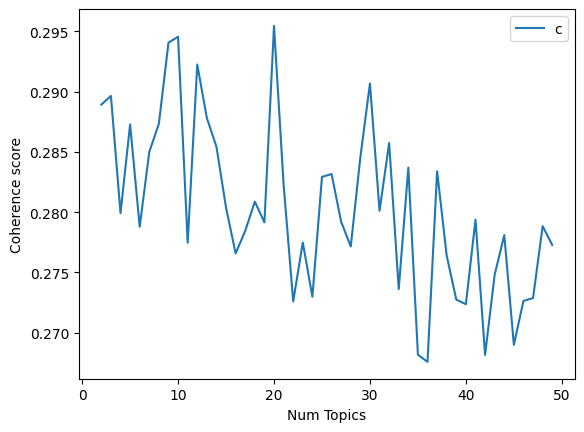

In [41]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [42]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2889
Num Topics = 3  has Coherence Value of 0.2896
Num Topics = 4  has Coherence Value of 0.2799
Num Topics = 5  has Coherence Value of 0.2873
Num Topics = 6  has Coherence Value of 0.2788
Num Topics = 7  has Coherence Value of 0.285
Num Topics = 8  has Coherence Value of 0.2873
Num Topics = 9  has Coherence Value of 0.2941
Num Topics = 10  has Coherence Value of 0.2946
Num Topics = 11  has Coherence Value of 0.2775
Num Topics = 12  has Coherence Value of 0.2923
Num Topics = 13  has Coherence Value of 0.2878
Num Topics = 14  has Coherence Value of 0.2854
Num Topics = 15  has Coherence Value of 0.2804
Num Topics = 16  has Coherence Value of 0.2766
Num Topics = 17  has Coherence Value of 0.2784
Num Topics = 18  has Coherence Value of 0.2809
Num Topics = 19  has Coherence Value of 0.2792
Num Topics = 20  has Coherence Value of 0.2955
Num Topics = 21  has Coherence Value of 0.2823
Num Topics = 22  has Coherence Value of 0.2726
Num Topics = 23  has C

In [43]:
# Select the model and print the topics
optimal_model = model_list[37]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(26,
  '0.016*"year" + 0.014*"project" + 0.011*"leadership" + 0.011*"support" + 0.010*"transportation" + 0.010*"sample" + 0.010*"capacity" + 0.010*"good" + 0.009*"loan" + 0.009*"hospital"'),
 (37,
  '0.025*"people" + 0.017*"service" + 0.017*"project" + 0.016*"government" + 0.015*"time" + 0.012*"strategy" + 0.012*"process" + 0.010*"laboratory" + 0.009*"many" + 0.009*"incentive"'),
 (23,
  '0.015*"government" + 0.014*"laboratory" + 0.013*"time" + 0.012*"feasibility" + 0.012*"service" + 0.012*"sample" + 0.011*"private" + 0.011*"thing" + 0.011*"study" + 0.011*"people"'),
 (20,
  '0.018*"people" + 0.018*"private" + 0.018*"government" + 0.017*"health" + 0.016*"project" + 0.012*"hospital" + 0.012*"service" + 0.011*"capacity" + 0.010*"good" + 0.010*"time"'),
 (3,
  '0.020*"private" + 0.018*"service" + 0.017*"health" + 0.016*"people" + 0.015*"government" + 0.013*"project" + 0.012*"sector" + 0.011*"partner" + 0.011*"good" + 0.010*"hospital"'),
 (12,
  '0.020*"private" + 0.014*"technical" + 0.01

In [44]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_response, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.836853601976517

Coherence Score:  0.28570417403019543


In [45]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis  


/home/longin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.060993 -0.001357       1        1  19.622906
31    -0.060098 -0.008119       2        1  11.543349
20    -0.053800  0.005842       3        1  10.629099
15    -0.055170  0.000569       4        1  10.316728
28    -0.050326 -0.000706       5        1   8.240059
16    -0.053441  0.004247       6        1   6.049780
35    -0.056603  0.015008       7        1   4.388210
37    -0.067031  0.014487       8        1   4.093891
30    -0.049189 -0.010292       9        1   3.647676
38    -0.048441  0.015723      10        1   3.602945
29    -0.039842 -0.050057      11        1   3.478035
11    -0.045433  0.016212      12        1   2.618610
10     0.005999 -0.149553      13        1   1.742801
6     -0.024271  0.017205      14        1   1.708868
21    -0.039715  0.012995      15        1   1.697354
12    -0.026802  0.040900      16        1   1.407463
23    -0.041808  0.026710      17        1   1.361635
1      0.060462 -0.052581      18        1   0.771603
2     -0.015402  0.011378      19        1   0.456185
34     0.025598  0.021036      20        1   0.423705
26     0.059309  0.009827      21        1   0.354641
19    -0.028534 -0.003218      22        1   0.348741
5      0.190225  0.044122      23        1   0.267858
24    -0.017314 -0.007655      24        1   0.262125
22    -0.006920 -0.016589      25        1   0.254630
25    -0.027766  0.011655      26        1   0.233554
3     -0.042524  0.004192      27        1   0.231709
8      0.063378  0.026663      28        1   0.087368
13     0.014480  0.005120      29        1   0.014407
9      0.025688 -0.010749      30        1   0.014407
17     0.093294  0.011222      31        1   0.014407
7      0.081280 -0.014880      32        1   0.014407
32     0.016854  0.011412      33        1   0.014407
33     0.087297  0.001826      34        1   0.014407
27     0.016602 -0.000103      35        1   0.014407
4      0.046614 -0.027846      36        1   0.014407
36    -0.023727  0.016746      37        1   0.014407
14    -0.028272  0.013036      38        1   0.014407
0      0.176339 -0.004426      39        1   0.014407, topic_info=           Term        Freq       Total Category  logprob  loglift
76   government  273.000000  273.000000  Default  30.0000  30.0000
146     private  255.000000  255.000000  Default  29.0000  29.0000
175     service  207.000000  207.000000  Default  28.0000  28.0000
172      sector  159.000000  159.000000  Default  27.0000  27.0000
78       health  164.000000  164.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
0          able    0.001608   72.354649  Topic39  -7.1212  -1.8689
109       model    0.001586   65.543597  Topic39  -7.1349  -1.7837
198        time    0.001599  111.689485  Topic39  -7.1273  -2.3091
49    different    0.001590  102.412645  Topic39  -7.1324  -2.2276
48   diagnostic    0.001565   55.420114  Topic39  -7.1487  -1.6298

[2685 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
757       1  0.249493  ability
757       3  0.124747  ability
757       5  0.124747  ability
757       8  0.124747  ability
0         1  0.207312     able
...     ...       ...      ...
991       2  0.445605  youyeah
991      16  0.445605  youyeah
992       1  0.262272        ™
992       2  0.262272        ™
992      16  0.262272        ™

[3567 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 32, 21, 16, 29, 17, 36, 38, 31, 39, 30, 12, 11, 7, 22, 13, 24, 2, 3, 35, 27, 20, 6, 25, 23, 26, 4, 9, 14, 10, 18, 8, 33, 34, 28, 5, 37, 15, 1])

# Word2vec Training

In [46]:
# pre-processing anad tokizine 
response_text = df_w2vec.Responses.apply(gensim.utils.simple_preprocess)
response_text

0     [involved, okay, think, part, sustainability, ...
1     [think, formal, engagement, project, hear, fri...
2     [involved, proposal, engaging, trying, manage,...
3     [know, dont, know, much, details, particular, ...
4     [think, meetings, lunch, colleagues, meeting, ...
                            ...                        
74    [chai, come, negotiator, come, help, depth, pa...
77    [sureness, attitude, course, know, initiatives...
78    [provided, steering, committee, approves, stee...
79    [attitude, convincing, models, possible, optio...
80    [sureness, attitude, operate, responsible, acc...
Name: Responses, Length: 79, dtype: object

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [47]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

# Build Vocabulary

In [48]:
model.build_vocab(response_text, progress_per=1000)

Train the Word2Vec Model

In [49]:
model.train(response_text, total_examples=model.corpus_count, epochs=model.epochs)

(103847, 128460)

In [50]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

In [51]:
model.wv.most_similar("test")

[('example', 0.999836802482605),
 ('level', 0.9998294115066528),
 ('many', 0.9998287558555603),
 ('know', 0.9998233318328857),
 ('even', 0.999822199344635),
 ('yeah', 0.9998215436935425),
 ('time', 0.9998211860656738),
 ('different', 0.9998202323913574),
 ('good', 0.9998182058334351),
 ('take', 0.9998168349266052)]

# similarity 

In [52]:
dataset['Transcripts'].tail(20)


733    rwa-int-pe_2022_02_03
734    rwa-int-pe_2022_02_03
735    rwa-int-pe_2022_02_03
736    rwa-int-pe_2022_02_03
737    rwa-int-pe_2022_02_03
738    rwa-int-pe_2022_02_03
739    rwa-int-pe_2022_02_03
740    rwa-int-pe_2022_02_03
741    rwa-int-pe_2022_02_03
742    rwa-int-pe_2022_02_03
743    rwa-int-pe_2022_02_03
744    rwa-int-pe_2022_02_03
745    rwa-int-pe_2022_02_03
746    rwa-int-pe_2022_02_03
747    rwa-int-pe_2022_02_03
748    rwa-int-pe_2022_02_03
749    rwa-int-pe_2022_02_03
750    rwa-int-pe_2022_02_03
751    rwa-int-pe_2022_02_03
752    rwa-int-pe_2022_02_03
Name: Transcripts, dtype: object

In [53]:

target_sentence = dataset[(dataset['Transcripts']=='rwa-int-pe-2021-10-26-fi' )& (dataset['Question number']==5)]
target_sentence=str(target_sentence.Responses)
sentences = dataset[(dataset['Transcripts']=='rwa-int-pe_2022_2_1' )& (dataset['Question number']==5)]
sentences=str(sentences.Responses)

In [54]:
w2v_vocab = set(model.wv.index_to_key)
# use n_similarity to compute a cosine similarity (should be reasonably robust)

# Show the target phrase and the most-similar target phrases


In [55]:
#sentences_similarity = np.zeros(len(sentences))

target_sentence_words = [w for w in target_sentence.split() if w in w2v_vocab]

sentence_words = [w for w in sentences.split() if w in w2v_vocab]
sim = model.wv.n_similarity(target_sentence_words, sentence_words)
sim   

0.9999226